In [1]:
import gc, sys

from dotenv import dotenv_values
from plantilla import plantilla

env = dotenv_values("globals.env")

proyecto = 'Códigos'
subproyecto = 'Testing - Deep Learning con MapTilesDownloader'

globales = plantilla(proyecto=proyecto, 
                     subproyecto=subproyecto,
                     path_proyectos=env['PATH_PROYECTOS']
           )

path_proyecto   = globales[0]     # Ubicación de la carpeta del Proyecto
path_datain     = globales[1]
path_dataout    = globales[2]     # Bases procesadas por tus scripts
path_scripts    = globales[3]
path_figures    = globales[4]     # Output para las figuras/gráficos
path_maps       = globales[5]     # Output para los mapas (html o imagen)
path_tables     = globales[6]     # Output para las tablas (imagen o excel)
path_programas  = globales[7]


R:/Tesis Nico\Códigos\scripts\Testing - Deep Learning con MapTilesDownloader
El directorio en scripts existe. Creando carpetas.
R:/Tesis Nico\Códigos\data ya existe
R:/Tesis Nico\Códigos\data\data_in ya existe
R:/Tesis Nico\Códigos\data\data_out ya existe
R:/Tesis Nico\Códigos\data\data_out\Testing - Deep Learning con MapTilesDownloader ya existe
R:/Tesis Nico\Códigos\docs ya existe
R:/Tesis Nico\Códigos\scripts ya existe
R:/Tesis Nico\Códigos\scripts\Testing - Deep Learning con MapTilesDownloader ya existe
R:/Tesis Nico\Códigos\outputs ya existe
R:/Tesis Nico\Códigos\outputs\figures ya existe
R:/Tesis Nico\Códigos\outputs\figures\Testing - Deep Learning con MapTilesDownloader ya existe
R:/Tesis Nico\Códigos\outputs\maps ya existe
R:/Tesis Nico\Códigos\outputs\maps\Testing - Deep Learning con MapTilesDownloader ya existe
R:/Tesis Nico\Códigos\outputs\tables ya existe
R:/Tesis Nico\Códigos\outputs\tables\Testing - Deep Learning con MapTilesDownloader ya existe


In [2]:
from tensorflow.keras import layers, models, Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import os
from PIL import Image
import numpy as np

# the next 3 lines of code are for my machine and setup due to https://github.com/tensorflow/tensorflow/issues/43174
import tensorflow as tf

# physical_devices = tf.config.list_physical_devices("GPU")
# tf.config.experimental.set_memory_growth(physical_devices[0], True)


C:\Users\ofici\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
def get_values_from_generator(generator: ImageDataGenerator) -> np.ndarray:
    '''This function returns the numeric data of the predicted variable 
        for each image from a generator      
    '''
    
    import pandas as pd
    
    data_array = pd.DataFrame({'image':generator.filepaths,'Real Value':generator.labels})
    data_array['image_name'] = data_array['image'].apply(lambda x: x.split('\\')[-1])
        
    return data_array

# data_list = []
# total_batches = int(generator.n / generator.batch_size) + 1

# for batch_index in tqdm(range(total_batches)):
# # while batch_index <= generator.batch_index:
#     data = generator.next()
#     data_list.append(data[1])

# # now, data_array is the numeric data of the predicted variable for each image
# data_array = np.concatenate(data_list)


In [4]:
# def open_images_and_predict(model, df, inference_folder: str, index: int) -> np.ndarray:
    
#     """[summary]

#     Parameters
#     ----------
#     inference_folder : str
#         Location of images for inferencing.

#     Returns
#     -------
#     np.ndarray
#         List of images as numpy arrays transformed to fit the efficient_net model input specs.
#     """
#     images = []
#     imgs_files = os.listdir(inference_folder)
#     imgs_files = [img for img in imgs_files if img.endswith(".tiff")]
#     imgs_files = imgs_files[index:index+100]
#     i = index
    
#     for img in imgs_files:
#         img_location = os.path.join(inference_folder, img)  # create full path to image
#         df.loc[i, 'image_name'] = img

#         with Image.open(img_location) as img:  # open image with pillow

#             img = np.array(img)
#             # img = img[134:378, 134:378, :3]
#             img = img[:, :, :3] 
#             img = np.expand_dims(img, axis=0)  # add 0 dimension to fit input shape of efficient_net
#             img = img / 255  # normalize image
#         predict = model.predict(img)
#         df.loc[i, 'prediction'] = predict[0][0]
            
#         images.append(img)
#         i += 1
    
#     return df

In [5]:
def crop_center(img, new_width, new_height):
    left = (img.size[0] - new_width)/2
    top = (img.size[1] - new_height)/2
    right = (img.size[0] + new_width)/2
    bottom = (img.size[1] + new_height)/2

    # Crop the center of the image
    img = img.crop((left, top, right, bottom))
    return img

def display_activation(original_img, activations, col_size, row_size, act_index): 
    import matplotlib.pyplot as plt
    import matplotlib.pylab as pl
    from matplotlib.colors import ListedColormap
    
    # Get extent of original image
    extent = (0, original_img.size[0], 0, original_img.size[1])
    
    activation = activations[act_index]
    activation_index=0
    
    # Choose colormap
    cmap = pl.cm.Purples

    # Get the colormap colors
    my_cmap = cmap(np.arange(cmap.N))

    # Set alpha
    my_cmap[:,-1] = np.linspace(0, 1, cmap.N)

    # Create new colormap
    my_cmap = ListedColormap(my_cmap)

    fig, ax = plt.subplots(row_size, col_size, figsize=(col_size*4, row_size*4))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(original_img, extent=extent)
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap=my_cmap, extent=extent)
            ax[row][col].set_xticklabels([])
            ax[row][col].set_yticklabels([])   
            activation_index += 1
    
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

In [6]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns

In [7]:
var = 'rmax'

In [8]:
path_proyecto   =  "R:/Tesis Nico/Códigos"    # Ubicación de la carpeta del Proyecto
subproyecto = 'Testing - Deep Learning con MapTilesDownloader'

path_dataout    = f"{path_proyecto}/data/data_out/{subproyecto}"  # Bases procesadas por tus scripts

In [9]:
import tensorflow_addons as tfa
def create_relu_advanced(max_value=1.):        
    def relu_advanced(x):
        return K.relu(x, max_value=K.cast_to_floatx(max_value))
    return relu_advanced

lr=0.00005         # lr=0.00005 para v0
radam = tfa.optimizers.RectifiedAdam(learning_rate=lr)

data = pd.read_parquet(f"{path_dataout}/dataset_indicadores_rc_con_img.parquet")
path_images = 'R:/Tesis Nico/Códigos/data/data_in/Imagenes descargadas'

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True)


In [ ]:
data['image_name'] = data['image'].apply(lambda x: x.split('\\')[-1])
data = data.dropna(subset=['image'])

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def get_values_from_generator(generator: ImageDataGenerator) -> np.ndarray:
    '''This function returns the numeric data of the predicted variable 
        for each image from a generator      
    '''
    
    import pandas as pd
    
    data_array = pd.DataFrame({'image':generator.filepaths,'Real Value':generator.labels})
    data_array['image_name'] = data_array['image'].apply(lambda x: x.split('\\')[-1])
        
    return data_array

    

def compare_predicted_vs_real(df, var):
    
    model = keras.models.load_model(f'R:/Tesis Nico/Códigos/data/data_out/Testing - Deep Learning con MapTilesDownloader/models/small_cnn_v3_1_reduc_{var}.h5', 
                          compile=False, custom_objects={'Lookahead': tfa.optimizers.Lookahead(radam, sync_period=6, slow_step_size=0.5)})#, 'relu_advanced': create_relu_advanced()})
  
    # train, val = train_test_split(data, test_size=0.2, random_state=1)  # split the data with a validation size o 20%
    test_generator = ImageDataGenerator(
        rescale=1.0 / 255,
    )

    test_generator = test_generator.flow_from_dataframe(
        dataframe=data, x_col="image", y_col=var, class_mode="raw", 
        target_size=(512, 512), batch_size=128, shuffle=False,
    )

    df = get_values_from_generator(test_generator)

    print("Generating predictions for test dataset...")
    predicted_values = model.predict(test_generator)
    df['Predicted Value'] = predicted_values[:,0]

    # Plot result
    sns_plot = sns.jointplot(data=df, x='Real Value', y='Predicted Value', kind='reg', scatter_kws={'s':1})
    sns_plot.fig.savefig(f'{path_figures}/small_cnn_v3_1_{var}_prediction.png')    
    
    return df


In [ ]:
datasets = {}
for var in ['rmax']:#, 'rmin', 'icv2010', 'aa_mean_mean']:
    temp = compare_predicted_vs_real(data, var)
    datasets[var] = temp

In [ ]:
(data.icv2010 *100 ).describe()

In [ ]:
# df['RMax (Real Value)'] = df['rmax']
sns_plot = sns.jointplot(data=df, x='Real Value', y='Predicted Value', kind='reg', scatter_kws={'s':1})
# sns_plot.fig.savefig(f'{path_figures}/small_cnn_v3_1_{var}_prediction.png')

In [ ]:
df

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

plot = sns.jointplot(data=df, x='Real Value', y='Predicted Value', kind='reg', scatter_kws={'s':1})

# Get the axis objects from the plot
ax_joint = plot.ax_joint

# Disable scientific notation on the axis labels
ax_joint.ticklabel_format(style='plain', useOffset=False)

# Show the plot
plt.show()

In [ ]:
df

In [ ]:
data = data.merge(df, on='image_name', how='left')

In [ ]:
data['dif'] = abs(data['Predicted Value'] - data['Real Value'])
data['dif'].mean()

In [ ]:
import geopandas as gpd

gdf = gpd.read_file(r"R:\Shapefiles\ICPAG\Sin barrios pop y cerr\Aglomerados de mas de 500k habitantes\base_icpag_500k.shp")


In [ ]:
maps = data[data.image_name.str.contains('GMaps')]
esri = data[data.image_name.str.contains('ESRI')]

In [ ]:
wide = esri.merge(maps[['Predicted Value','link']], on='link', suffixes=(' esri',' maps'))
geo = gdf[['link','geometry']].merge(wide, on='link')

wide[['Predicted Value esri','Predicted Value maps']].corr()


In [ ]:
sns.jointplot(data=wide, x='Predicted Value esri', y='Predicted Value maps', kind='reg', scatter_kws={'s':1})


In [ ]:
geo['diff_gmaps_esri'] = geo['Predicted Value maps'] - geo['Predicted Value esri']
geo['diff_real_esri'] = geo['rmax_x'] - geo['Predicted Value esri']
geo['diff_real_gmaps'] = geo['rmax_x'] - geo['Predicted Value maps']

geo.explore(column='diff_gmaps_esri', cmap='RdYlGn', scheme='quantiles', k=5, legend=True,
            tooltip=['link','rmax_x', 'diff_gmaps_esri', 'diff_real_esri', 'diff_real_gmaps', 'Predicted Value esri','Predicted Value maps'])

In [ ]:
esri[esri.link == '066581007']

In [ ]:
esri.merge(maps, on='link')

In [ ]:
maps

In [ ]:
# Mapa
geo.explore(column='Predicted Value', 
    tooltip=['rmax_x','Predicted Value','link'], style_kwds={'fillOpacity': 0.5},
    tiles='https://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', attr='asd')

In [ ]:
# Errores
geo['dif'] = (geo['rmax_x'] - geo['Predicted Value'])**2
geo.explore(column='dif', vmax = 0.1, 
    tooltip=['rmax_x','Predicted Value','link'], style_kwds={'fillOpacity': 0.5},
    tiles='https://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', attr='asd')

In [ ]:
%tensorboard


In [ ]:
# for i in range(0, len(data), 100):
#     df = open_images_and_predict(model, data, path_images, i)

In [ ]:
# Las prediciones están concentradas en 1...
import seaborn as sns
sns.histplot(data.rmax)

In [ ]:
val
asdddd

In [ ]:
sns.scatterplot(data=val, x='rmax_c', y='predict', hue='fuente')

In [ ]:
# El modelo original sobreestima el rmax
sns.histplot(val.predict - val.rmax_c)
print(abs(val.predict - val.rmax_c).mean())

In [ ]:
import keras

In [12]:
model = keras.models.load_model(f'R:/Tesis Nico/Códigos/data/data_out/Testing - Deep Learning con MapTilesDownloader/models/small_cnn_v3_1_reduc_rmax.h5', 
                        compile=False, custom_objects={'Lookahead': tfa.optimizers.Lookahead(radam, sync_period=6, slow_step_size=0.5)})#, 'relu_advanced': create_relu_advanced()})


In [20]:
model

In [15]:
layer_outputs

[<KerasTensor: shape=(None, 128, 128, 3) dtype=float32 (created by layer 'resizing')>,
 <KerasTensor: shape=(None, 126, 126, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 126, 126, 32) dtype=float32 (created by layer 'layer_normalization')>,
 <KerasTensor: shape=(None, 126, 126, 32) dtype=float32 (created by layer 'activation')>,
 <KerasTensor: shape=(None, 63, 63, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 61, 61, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 61, 61, 64) dtype=float32 (created by layer 'layer_normalization_1')>,
 <KerasTensor: shape=(None, 61, 61, 64) dtype=float32 (created by layer 'activation_1')>,
 <KerasTensor: shape=(None, 30, 30, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 28, 28, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 28, 28, 64) dtype=float32 (created by layer 'layer_normalization_

1/1 [==============================] - 0s 323ms/step


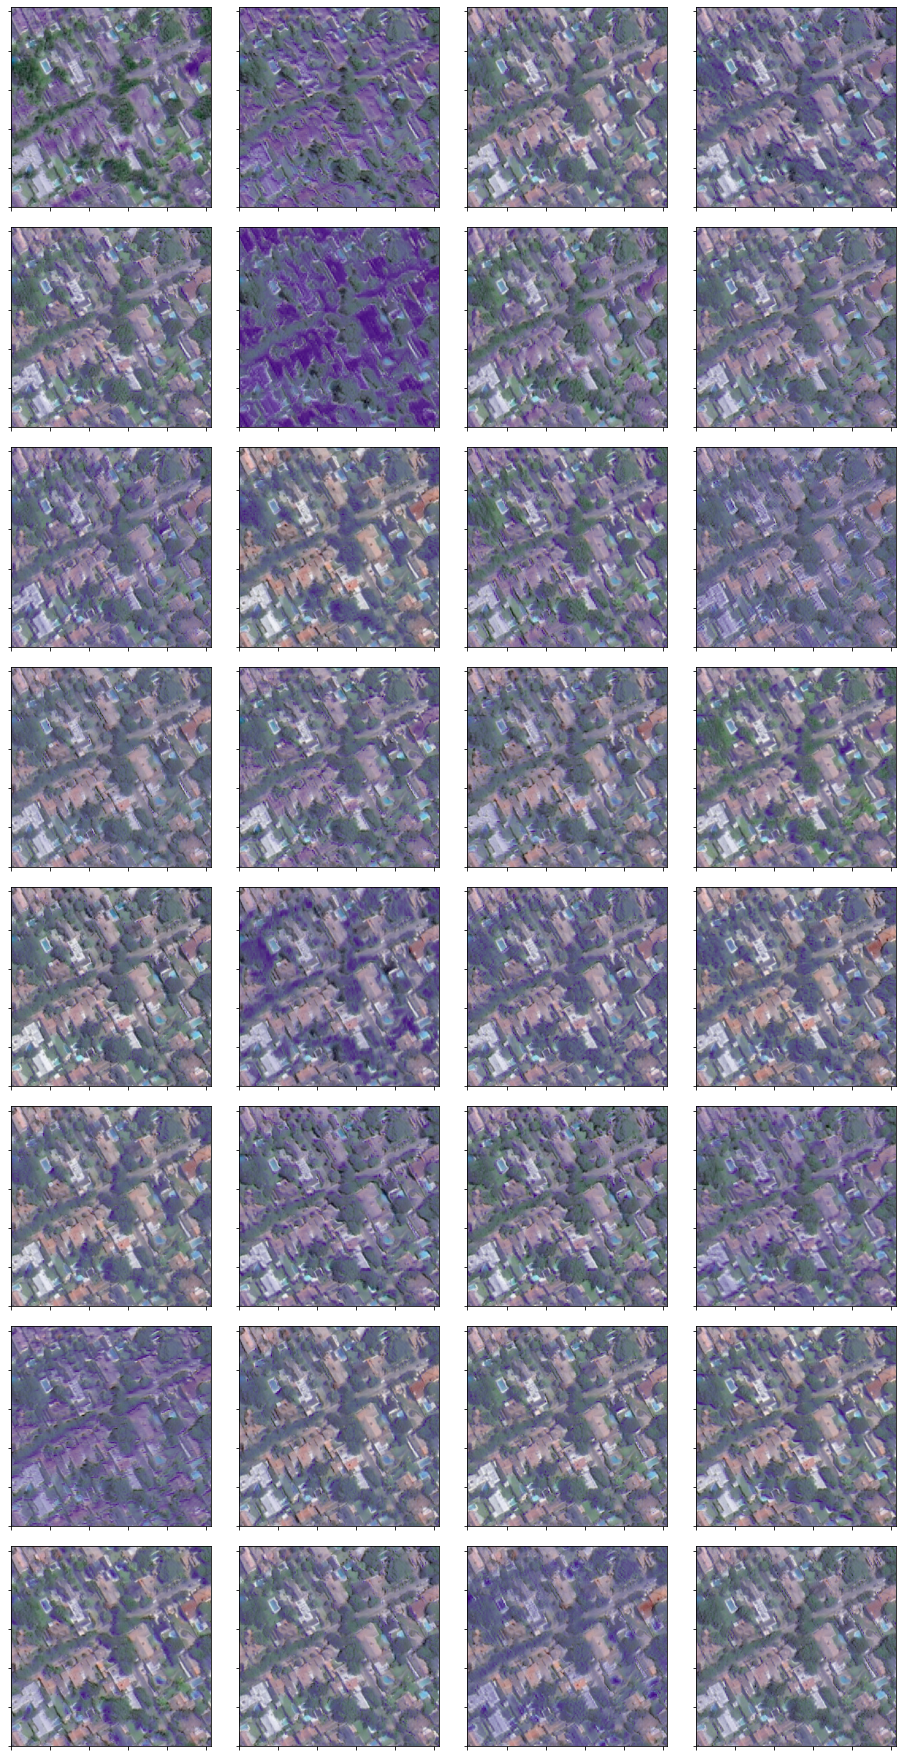

In [48]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

original_img = Image.open(r"R:\Tesis Nico\Códigos\data\data_in\Imagenes descargadas\GMaps_067560105.tiff")
img = np.array(original_img)
img = img[:, :, :3]           
img = np.expand_dims(img, axis=0) / 255
activations = activation_model.predict(img)

crop_img = crop_center(original_img, 300, 300)
display_activation(original_img, activations, 4, 8, 2)

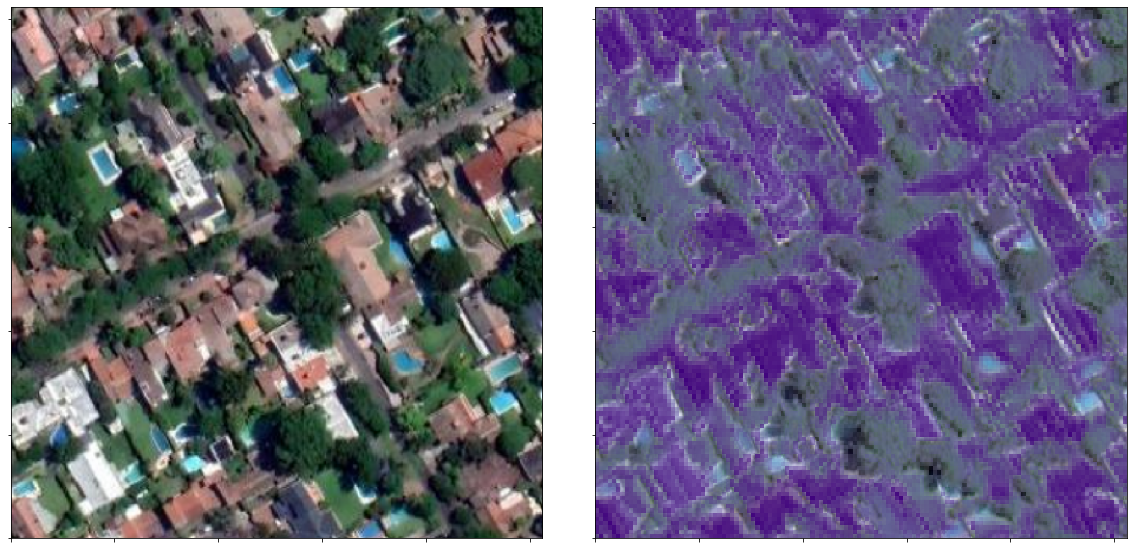

In [49]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap

original_img = Image.open(r"R:\Tesis Nico\Códigos\data\data_in\Imagenes descargadas\GMaps_067560105.tiff")

# Get extent of original image
extent = (0, original_img.size[0], 0, original_img.size[1])

activation = activations[2]
activation_index=0

# Choose colormap
cmap = pl.cm.Purples

# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))

# Set alpha
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)

# Create new colormap
my_cmap = ListedColormap(my_cmap)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].imshow(original_img, extent=extent)
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])  

axs[1].imshow(original_img, extent=extent)
axs[1].imshow(activation[0, :, :, 5], cmap=my_cmap, extent=extent)
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])   

#### Techos
plt.subplots_adjust(wspace=0.1, hspace=0.1)

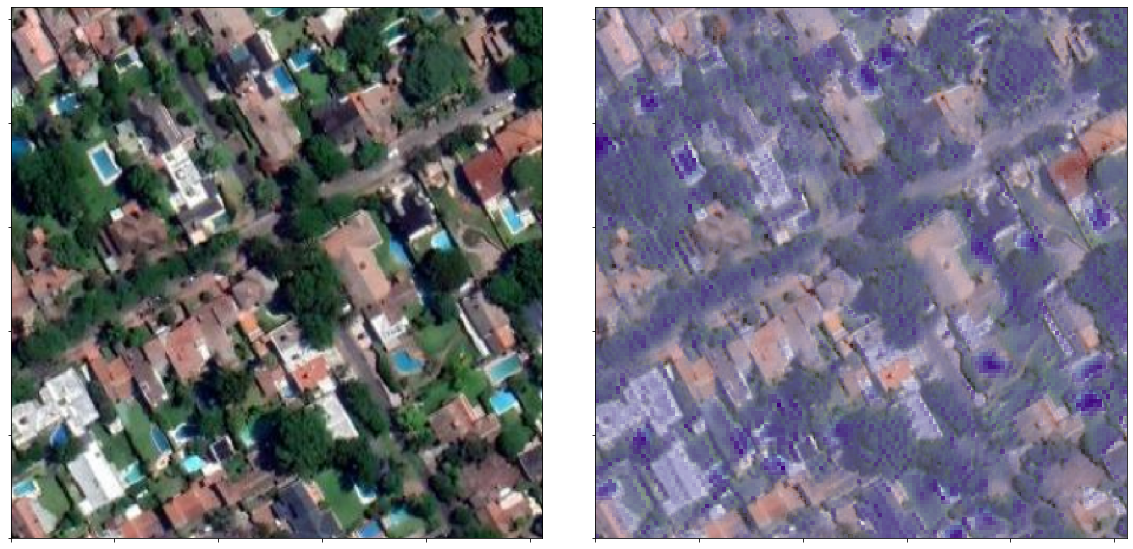

In [50]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap

original_img = Image.open(r"R:\Tesis Nico\Códigos\data\data_in\Imagenes descargadas\GMaps_067560105.tiff")

# Get extent of original image
extent = (0, original_img.size[0], 0, original_img.size[1])

activation = activations[2]
activation_index=0

# Choose colormap
cmap = pl.cm.Purples

# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))

# Set alpha
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)

# Create new colormap
my_cmap = ListedColormap(my_cmap)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].imshow(original_img, extent=extent)
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])  

axs[1].imshow(original_img, extent=extent)
axs[1].imshow(activation[0, :, :, 30], cmap=my_cmap, extent=extent)
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])   

#### PILETAS
plt.subplots_adjust(wspace=0.1, hspace=0.1)

In [ ]:
                                                                                                                                                                                                                                                                                        (original_img, 300, 300)

In [ ]:
import keras.backend as K

# With a Keras function
get_all_layer_outputs = K.function([model.layers[0].input],
                                  [l.output for l in model.layers[1:]])

layer_output = get_all_layer_outputs([img]) # return the same thing

In [ ]:
model.layers

In [ ]:
layer_output[0].shape

In [ ]:
data.image_name.notna().sum()

In [ ]:
predictions.shape

In [ ]:
%tensorboard